<a href="https://colab.research.google.com/github/emmendezp/AlgorithmsUN2021II/blob/main/Lab%2013/AlgorithmicToolboxWeek3Group24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MONEY CHANGE

In [13]:
%%writefile change.cpp

#include <bits/stdc++.h>
using namespace std;

void get_change()
{
  int m;
  scanf("%d", &m);
  int count = m / 10;
  m %= 10;
  count += m / 5 + m % 5;
  printf("%d", count);
}

int main()
{
  get_change();
  return 0;
}



Overwriting change.cpp


In [14]:
!g++ change.cpp -o change
!./change

2
2

#MAXIMUM VALUE OF THE LOOT

In [15]:
%%writefile MVFL.cpp
#include <bits/stdc++.h>
using namespace std;

void get_optimal_value()
{
  int n, W, val, weight;
  scanf("%d %d", &n, &W);
  double ans = 0;
  vector<pair<double, pair<int, int>>> a;
  for (int i = 0; i < n; ++i)
  {
    scanf("%d %d", &val, &weight);
    a.push_back(make_pair((double)val / weight, make_pair(val, weight)));
  }
  sort(a.rbegin(), a.rend());
  for (int i = 0; i < n; ++i)
  {
    W -= a[i].second.second;
    ans += a[i].second.first;
    if (W <= 0)
    {
      if (W < 0)
        ans -= abs(W) * a[i].first;
      break;
    }
  }
  printf("%.4f", ans);
}

int main()
{
  get_optimal_value();
  return 0;
}

Writing MVFL.cpp


In [21]:
!g++ MVFL.cpp -o MVFL
!./MVFL

1 10
500 30
166.6667

#car fueling 

In [22]:
%%writefile car.cpp
#include <bits/stdc++.h>
using namespace std;

template <typename ForwardIterator, typename T>
ForwardIterator first_less_than_or_equal(ForwardIterator first, ForwardIterator last, T val)
{
    auto it = upper_bound(first, last, val);
    return (it == first) ? last : (it - 1);
}

void compute_min_refills()
{
    int d, m, n, x, ans = 0, pos = 0;
    scanf("%d %d %d", &d, &m, &n);
    vector<int> a;
    if (m >= d)
    {
        printf("%d", 0);
        return;
    }
    for (int i = 0; i < n; ++i)
    {
        scanf("%d", &x);
        a.push_back(x);
    }
    a.push_back(d);
    int from = 0;
    int i = 0;
    while (i <= n)
    {
        auto it = first_less_than_or_equal(a.begin() + i, a.end(), (m + pos));
        if (it == a.end())
        {
            printf("%d", -1);
            return;
        }
        i = distance(a.begin(), it) + 1;
        pos = *it;
        ans++;
    }
    printf("%d", ans - 1);
}

int main()
{
    compute_min_refills();
    return 0;
}


Writing car.cpp


In [23]:
!g++ car.cpp -o car
!./car

600
400
4
200 375 550 750
1

# maximum_advertisement_revenue

In [25]:
%%writefile MAX.cpp
#include <bits/stdc++.h>
using namespace std;
typedef vector<int> VI;
typedef long long ll;

void max_dot_product()
{
  int n, x;
  scanf("%d", &n);
  VI a, c;
  for (int i = 0; i < n; i++)
  {
    scanf("%d", &x);
    a.push_back(x);
  }
  for (int i = 0; i < n; i++)
  {
    scanf("%d", &x);
    c.push_back(x);
  }
  sort(a.begin(), a.end());
  sort(c.begin(), c.end());
  ll sum = 0;
  for (int i = 0; i < n; i++)
    sum += (ll)a[i] * c[i];
  printf("%lld", sum);
}

int main()
{
  max_dot_product();
  return 0;
}


Writing MAX.cpp


In [27]:
!g++ MAX.cpp -o MAX
!./MAX

3 1 3 -5 -2 4 1
23

#collecting_signatures

In [28]:
%%writefile col.cpp
#include <bits/stdc++.h>
using namespace std;
typedef vector<int> VI;

void optimal_points()
{
  struct Segment
  {
    int start, end;
  };
  int n;
  scanf("%d", &n);
  vector<Segment> v;
  {
    int a, b;
    for (int i = 0; i < n; ++i)
    {
      scanf("%d %d", &a, &b);
      v.push_back({a, b});
    }
  }
  sort(v.begin(), v.end(), [](Segment &a, Segment &b) { return a.end < b.end; });
  VI ans;
  while (v.size())
  {
    int p = v[0].end;
    ans.push_back(p);
    v.erase(v.begin());
    int i = 0;
    while (i < v.size())
      if (v[i].start <= p && p <= v[i].end)
        v.erase(v.begin() + i);
      else
        i++;
  }
  printf("%ld\n", ans.size());
  for (auto &e : ans)
    printf("%d ", e);
}

int main()
{
  optimal_points();
  return 0;
}


Writing col.cpp


In [32]:
!g++ col.cpp -o col
!./col

4 4 7 1 3 2 5 5 6
2
3 6 

#maximum_number_of_prizes

In [34]:
%%writefile num.cpp
#include <bits/stdc++.h>
using namespace std;
typedef vector<int> VI;

void optimal_summands()
{
  int n;
  scanf("%d", &n);
  int i = 1;
  int sum = 0;
  VI ans;
  while (i + sum != n)
  {
    int check = sum + i + i + 1;
    if (check <= n)
    {
      sum += i;
      ans.push_back(i);
    }
    i++;
  }
  ans.push_back(i);
  printf("%ld\n", ans.size());
  for (auto &e : ans)
    printf("%d ", e);
}

int main()
{
  optimal_summands();
  return 0;
}


Writing num.cpp


In [35]:
!g++ num.cpp -o num
!./num

8
3
1 2 5 

#maximum_salary

In [36]:
%%writefile sal.cpp
#include <bits/stdc++.h>
using namespace std;

struct my_struct
{
  string s, cpy;
};

bool my_sort(my_struct &a, my_struct &b)
{
  if (a.cpy > b.cpy)
    return true;
  if (a.cpy == b.cpy)
    return a.s + b.s > b.s + a.s;
  return false;
}

void largest_number()
{
  int n;
  cin >> n;
  vector<my_struct> a(n);
  for (size_t i = 0; i < a.size(); ++i)
  {
    cin >> a[i].s;
    int l = a[i].s.length();
    a[i].cpy = a[i].s + string(4 - l, a[i].s[0]);
  }
  sort(a.begin(), a.end(), my_sort);
  std::stringstream ret;
  for (size_t i = 0; i < a.size(); ++i)
    ret << a[i].s;
  string result;
  ret >> result;
  cout << result;
}

int main()
{
  ios::sync_with_stdio(0);
  cin.tie(0);
  largest_number();
  return 0;
}

Writing sal.cpp


In [37]:
!g++ sal.cpp -o sal
!./sal

2
100 20
20100

#ELKIN MAURICIO MENDEZ PINZON


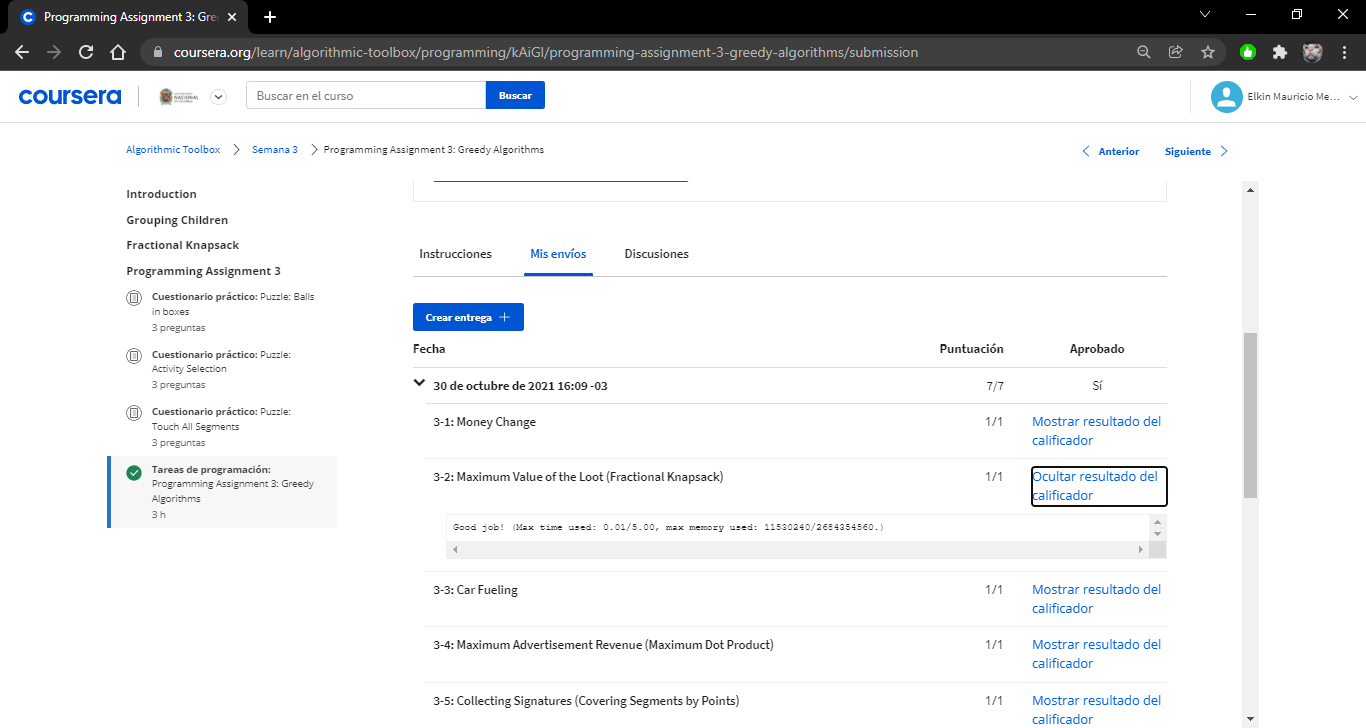